In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.gridspec import GridSpec
plt.style.use("../paper_plots/paper.mplstyle")

In [2]:
# Tex
plt.rcParams["text.usetex"] = True

In [3]:
# Loading timing data
timing_data = np.load("timings.npy")
timing_data_e = np.load("timings_e.npy")

In [4]:
energies = [1e2, 1e3, 1e4, 1e5]
event_count = 5
scaling = 1000 / 5

In [5]:
added_col = np.hstack((timing_data, np.reshape(timing_data[:, -2], (len(energies), 1))))
added_col_e = np.hstack((timing_data_e, np.reshape(timing_data_e[:, -2], (len(energies), 1))))

In [6]:
added_col[:, -3] = added_col[:, -3] * 0.1
plot_arr = np.zeros((4, 5))
plot_arr[:, 0] = added_col[:, 0] * 1./3.
plot_arr[:, 1] = added_col[:, 1] + 2./3. * added_col[:, 0]
plot_arr[:, 2] = added_col[:, -2]
plot_arr[:, 3] = added_col[:, -3]
plot_arr[:, 4] = added_col[:, -1]

added_col_e[:, -3] = added_col_e[:, -3] * 0.1
plot_arr_e = np.zeros((4, 5))
plot_arr_e[:, 0] = added_col_e[:, 0] * 1./3.
plot_arr_e[:, 1] = added_col_e[:, 1] + 2./3. * added_col_e[:, 0]
plot_arr_e[:, 2] = added_col_e[:, -2]
plot_arr_e[:, 3] = added_col_e[:, -3]
plot_arr_e[:, 4] = added_col_e[:, -1]

In [24]:
def make_plot_mu(timingdata, energies, idx, ax=None):
    labels = [
        "Miscellaneous",
        "Injection",
        "Saving output",
        "Lepton propagation",
        "Photon propagation",
    ]

    if ax is None:
        _, ax = plt.subplots(figsize=(6,4))
    y2 = np.zeros(len(energies))
    for x in range(len(labels)):
        label = labels[x]
        y1 = y2
        if x < 2:
            y2 = y1 + timingdata[:, x] * 2.5
        elif x == 2:
            y2 = y1 + timingdata[:, x] * 5
        elif x == len(labels)-1:
            y2 = y1 + timingdata[:, x] * 90
        else:
            y2 = y1 + timingdata[:, x]  * 40
        y2 = y2
        ax.fill_between(energies, y1, y2, label=label)
        ax.plot(energies, y2, color="k", lw=1.5)
    return ax

In [25]:
def make_plot_tau(timingdata, energies, idx, ax=None):
    labels = [
        "Miscellaneous",
        "Injection",
        "Saving output",
        "Lepton propagation",
        "Photon propagation",
    ]

    if ax is None:
        _, ax = plt.subplots(figsize=(6,4))
    y2 = np.zeros(len(energies))
    for x in range(len(labels)):
        label = labels[x]
        y1 = y2
        if x < 2:
            y2 = y1 + timingdata[:, x] * 2.5
        elif x == 2:
            y2 = y1 + timingdata[:, x] * 2 * 11
        elif x == len(labels)-1:
            y2 = y1 + timingdata[:, x] * 1.2 * 90
        else:
            y2 = y1 + timingdata[:, x]  * 40
        y2 = y2
        ax.fill_between(energies, y1, y2)
        ax.plot(energies, y2, color="k", lw=1.5)
    return ax

In [26]:
def make_plot_e(timingdata, energies, idx, ax=None):
    labels = [
        "Miscellaneous",
        "Injection",
        "Saving output",
        "Lepton propagation",
        "Photon propagation",
    ]

    if ax is None:
        _, ax = plt.subplots(figsize=(6,4))
    y2 = np.zeros(len(energies))
    if idx < 3:
        for x in range(len(labels)):
            label = labels[x]
            y1 = y2
            if x < 2:
                y2 = y1 + timingdata[:, x] * 2.5
            elif x == 2:
                y2 = y1 + timingdata[:, x] * 2 * 11
            elif x == len(labels)-1:
                y2 = y1 + timingdata[:, x] * 90
            else:
                y2 = y1 + timingdata[:, x]  * 40
            y2 = y2
            ax.fill_between(energies, y1, y2)
            ax.plot(energies, y2, color="k", lw=1.5)
        return ax
    else:
        for x in range(len(labels)):
            label = labels[x]
            y1 = y2
            if x < 2:
                y2 = y1 + timingdata[:, x] * 2.5
            elif x == 2:
                y2 = y1 + timingdata[:, x] * 2 * 11
            elif x == 3:
                    y2 = y1
            elif x == len(labels)-1:
                y2 = y1 + timingdata[:, x] * 80
            else:
                y2 = y1 + timingdata[:, x]  * 40
            y2 = y2
            ax.fill_between(energies, y1, y2)
            ax.plot(energies, y2, color="k", lw=1.5)
        return ax

here


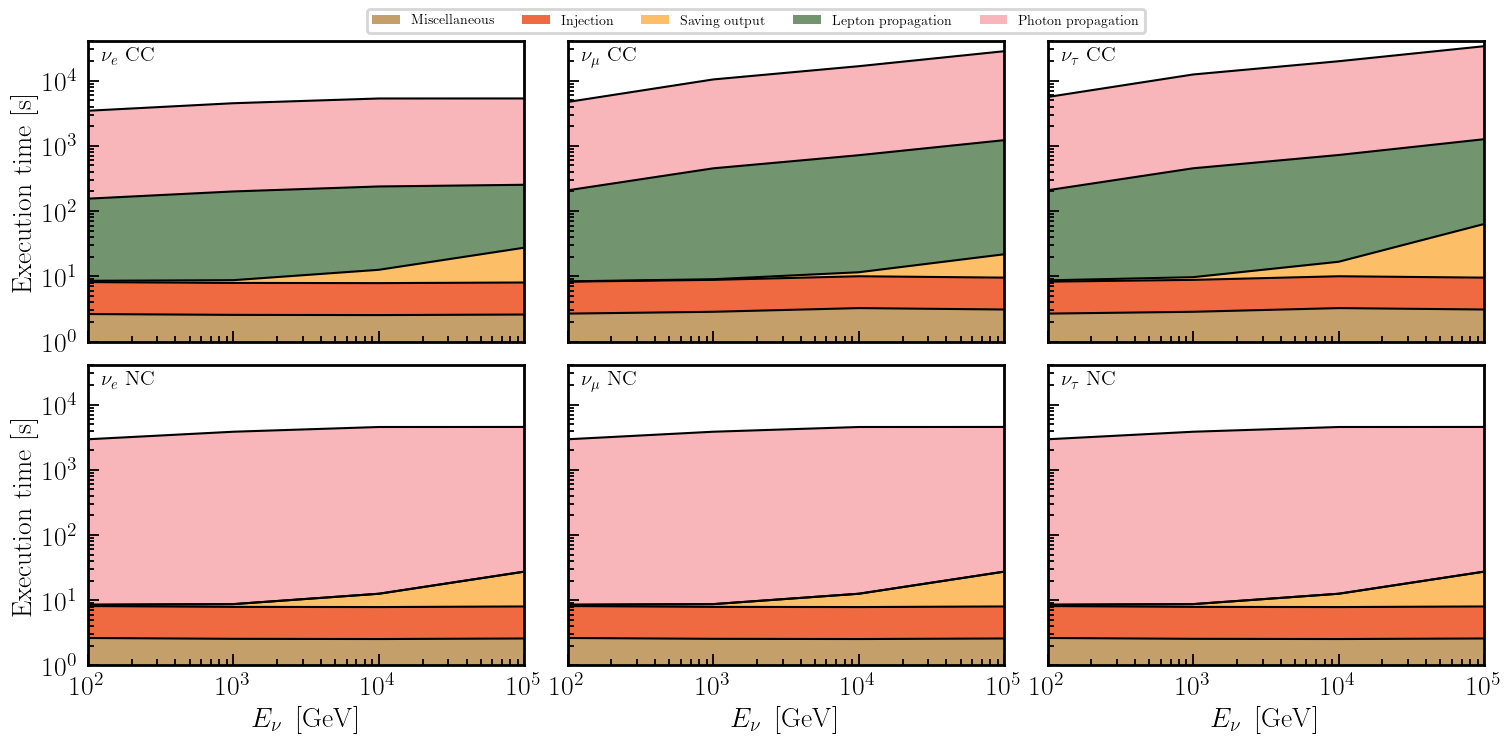

In [32]:
fig = plt.figure(
    constrained_layout=True,
    figsize=(15, 7)
)
gs = GridSpec(2, 3, figure=fig, wspace=0.004, hspace=0.025)

timing_dirs = ["EMinus/", "MuMinus/", "TauMinus/", "NuE/", "NuE/", "NuE/"]
labels = [r'$\nu_{e}$ CC', r'$\nu_{\mu}$ CC', r'$\nu_{\tau}$ CC', r'$\nu_{e}$ NC', r'$\nu_{\mu}$ NC', r'$\nu_{\tau}$ NC']
for idx, (label, timing_dir) in enumerate(zip(labels, timing_dirs)):
    row = 0
    col = idx % 3
    if idx > 2:
        row = 1
    ax = fig.add_subplot(gs[row, col])
    if idx in [0, 3, 4, 5]:
        ax = make_plot_e(plot_arr_e, energies, idx, ax=ax)
    elif idx in [2]:
        ax = make_plot_tau(plot_arr, energies, idx, ax=ax)
    else:
        print('here')
        ax = make_plot_mu(plot_arr, energies, idx, ax=ax)
    ax.loglog()
    ax.text(
        125,
        2.e4,
        label,
        # bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5},
        fontsize=15
    )
    if col!=0:
        ax.set_yticklabels([])
    if row==0:
        ax.set_xticklabels([])
    ax.set_xlim(100, 1e5)
    ax.set_ylim(1, 4e4)
    if row==1:
        ax.set_xlabel(r"$E_{\nu}~\left[\rm{GeV}\right]$")
    if col==0:
        ax.set_ylabel(r"Execution time [s]")
    [i.set_linewidth(2) for i in ax.spines.values()]
    # ax.tick_params(axis="both", direction="in", which="both", right=False, top=False)
    ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
    ax.set_yticks([1e0, 1e1, 1e2, 1e3, 1e4])
fig.legend(loc=9, bbox_to_anchor=(0.5, 1.05), ncol=5, frameon=True, fontsize=10)
plt.savefig("prometheus_timing.pdf")
plt.show()